<a href="https://colab.research.google.com/github/sphzh/DataBootcampFinalProject/blob/master/Sophie_Zhu_LinearAlgebra_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please follow the instructions carefully. Write all your code in a `Code` cell, and your explanations in a `Markdown` cell. Make sure that your code compiles correctly either by selecting a given cell and clicking the `Run` button, or by hitting `shift`+`enter` or `shift`+`return`.

### 1. Import `numpy`, `numpy.linalg`, `matplotlib.pyplot`, and `pandas`. Use the appropriate aliases when importing these modules.

In [ ]:
# code for question 1
import numpy as np
import numpy.linalg as la             
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

### 2. Load the data from the file named `data_stock_returns.csv` into a `DatFrame` called `returns`. The file `data_stock_returns.csv` contains daily returns of a number of stocks selected from the S&P 500 universe. The rows of the csv file represent the returns over a number of days, and the columns represent individual stocks labeled by their NYSE ticker symbol, e.g., Apple stock is labeled `AAPL`.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# code for question 2
returns = pd.read_csv('/content/drive/MyDrive/LinAlg/data_stock_returns.csv').set_index('Date')

### 3. View the `head` of the `returns` `DataFrame`

In [ ]:
# code for question 3
returns.head()

,ATVI,CHTR,CMCSA,CTL,DIS,DISCA,DISCK,DISH,EA,FB,GOOG,GOOGL,IPG,LYV,NFLX,NWS,NWSA,OMC,T,TMUS,TTWO,TWTR,VZ,AAP,AMZN,APTV,AZO,BBY,BKNG,BWA,CCL,CMG,DG,DHI,DLTR,DPZ,DRI,EBAY,EXPE,F,...,PEAK,PLD,PSA,REG,SBAC,SLG,SPG,UDR,VNO,VTR,WELL,WY,AEE,AEP,AES,ATO,AWK,CMS,CNP,D,DTE,DUK,ED,EIX,ES,ETR,EVRG,EXC,FE,LNT,NEE,NI,NRG,PEG,PNW,PPL,SO,SRE,WEC,XEL
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02,0.009829,0.010542,0.009354,0.018961,-0.006221,0.043115,0.031979,0.035795,0.018333,0.034415,0.009839,0.009259,-0.019085,-0.019271,0.000000,0.005181,0.003518,-0.007263,0.034439,0.025609,0.010341,0.002433,-0.003564,0.002917,0.024440,-0.006845,0.000167,0.012012,-0.000418,0.011164,0.011095,0.026443,-0.003429,0.017446,0.009696,-0.019093,0.000701,0.027409,-0.005965,0.032157,...,-0.034605,-0.029203,-0.036988,-0.032386,-0.007067,-0.016576,-0.017898,-0.031537,-0.027291,-0.028917,-0.031019,-0.015211,-0.026407,-0.024378,-0.019554,-0.031443,-0.022280,-0.027360,-0.008181,-0.003926,-0.022092,-0.018714,-0.017415,-0.000352,-0.024120,-0.024344,-0.015801,-0.023103,-0.022352,-0.026380,-0.023222,-0.011107,-0.038352,-0.023718,-0.027728,-0.007796,-0.004564,-0.013306,-0.024556,-0.021542
2019-01-03,-0.036155,-0.001703,0.007825,0.004524,-0.024525,-0.005824,0.002515,0.020651,-0.020871,-0.029469,-0.028898,-0.028086,0.007874,-0.012917,0.013139,-0.013004,-0.009705,-0.015803,0.001353,-0.003684,-0.047853,-0.028875,0.003564,0.030741,-0.025566,-0.012010,0.008432,-0.020736,-0.034617,-0.030638,-0.051029,-0.008858,0.001206,-0.003977,-0.004836,-0.014949,-0.016243,-0.018542,-0.031386,-0.015306,...,0.035321,-0.008099,0.018992,0.001407,0.011074,-0.004123,-0.000849,0.004937,-0.002654,0.016725,0.018260,0.033344,0.002515,-0.002333,-0.000705,0.007540,0.003935,0.001861,0.005698,-0.004788,0.004162,-0.000354,0.002525,0.001585,-0.000630,0.002022,-0.003765,0.001134,-0.000273,0.001700,-0.002476,0.001196,-0.009491,-0.000197,0.010085,-0.003564,0.014082,0.004579,0.002660,-0.003948
2019-01-04,0.039127,0.051651,0.033218,0.027974,0.030381,0.017754,0.019072,0.068034,0.070034,0.046061,0.052390,0.050021,0.016047,0.047301,0.092793,0.042705,0.042523,0.024430,0.025369,0.037285,0.025393,0.067682,0.002487,-0.025121,0.048851,0.035764,-0.011837,0.004751,0.032204,0.036881,0.055033,0.034773,0.008587,0.045083,0.023197,0.016181,0.030846,0.022692,0.041249,0.037836,...,0.000715,0.024964,-0.011128,0.003685,0.002458,0.024485,0.015110,-0.001557,0.016638,-0.004849,-0.003655,0.033572,0.014032,0.009165,0.032630,0.012732,0.007490,0.009255,0.018298,0.019155,0.015115,0.008233,0.016066,0.027418,0.010036,0.007457,0.003944,0.011269,0.012453,0.012057,0.018249,0.017378,0.033601,0.010764,0.012229,0.030242,0.008310,0.029491,0.007352,0.009738
2019-01-07,0.027806,-0.004204,-0.010668,0.021706,0.008630,0.014810,0.014271,0.011252,0.036862,0.000725,-0.002169,-0.001996,0.024304,0.017840,0.058002,0.019868,0.017685,0.005711,0.017965,0.013978,0.026298,0.045366,0.006367,0.014565,0.033776,0.015057,-0.016056,0.055493,-0.003342,0.025693,0.011719,0.064161,0.040291,0.017532,0.053143,0.011550,0.024741,0.017112,0.012915,0.025658,...,0.011729,0.016077,-0.002801,0.009760,0.010075,0.028930,0.010460,0.002075,0.018934,0.005540,0.011793,0.019786,-0.011523,-0.005598,0.004770,-0.007334,-0.010637,-0.005131,0.003828,-0.009741,-0.003369,-0.004226,-0.014606,-0.018660,-0.002500,-0.004728,0.001073,0.001791,0.012566,-0.006975,-0.001450,0.005467,0.009179,0.002139,-0.001890,0.001384,-0.002239,-0.000181,-0.004552,-0.004339
2019-01-08,0.029859,-0.002524,0.008152,0.025441,0.007748,0.026410,0.020041,0.002793,0.016194,0.031937,0.007358,0.008745,0.030144,0.023494,0.015513,0.009788,0.014913,0.016671,0.012547,-0.009838,0.033065,0.014571,0.028846,-0.006975,0.016476,0.052700,-0.013405,0.028988,-0.014653,0.030947,0.024577,0.024876,0.004770,-0.004019,0.006512,-0.017273,0.016034,0.017825,0.020819,0.009604,...,0.010895,0.032713,0.017795,0.020938,0.016092,0.039475,0.023605,0.022542,0.025951,0.009964,0.017504,0.005945,0.015695,0.012248,0.0

### 4. View the `tail` of the `returns` `DataFrame`

In [ ]:
# code for question 4
returns.tail()

,ATVI,CHTR,CMCSA,CTL,DIS,DISCA,DISCK,DISH,EA,FB,GOOG,GOOGL,IPG,LYV,NFLX,NWS,NWSA,OMC,T,TMUS,TTWO,TWTR,VZ,AAP,AMZN,APTV,AZO,BBY,BKNG,BWA,CCL,CMG,DG,DHI,DLTR,DPZ,DRI,EBAY,EXPE,F,...,PEAK,PLD,PSA,REG,SBAC,SLG,SPG,UDR,VNO,VTR,WELL,WY,AEE,AEP,AES,ATO,AWK,CMS,CNP,D,DTE,DUK,ED,EIX,ES,ETR,EVRG,EXC,FE,LNT,NEE,NI,NRG,PEG,PNW,PPL,SO,SRE,WEC,XEL
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-24,-0.001359,0.000291,0.009703,-0.002277,0.004207,0.003943,0.007496,0.001956,0.007026,-0.005154,-0.003922,-0.004601,-0.000434,0.002410,0.000300,-0.001399,-0.001430,0.001609,-0.002819,0.004667,0.014713,0.002156,-0.001956,0.003744,-0.002116,-0.006722,0.004472,0.003303,0.005839,-0.009526,-0.006262,0.000724,0.007000,0.007547,0.008510,0.004741,-0.001842,0.000000,0.007104,0.003173,...,0.002391,0.002964,-0.001761,-0.001131,-0.001914,0.004920,0.005503,0.004134,0.002980,-0.001916,0.001001,-0.009668,0.001453,0.000960,-0.003032,-0.004782,0.001893,-0.000161,0.001122,-0.000860,-0.004671,0.000887,-0.001226,0.000134,0.002743,0.007311,0.006562,0.002651,0.001858,-0.000553,0.007219,-0.000729,-0.004752,-0.001537,-0.001350,-0.001122,-0.002057,0.000598,0.001529,0.003905
2019-12-26,0.001359,0.010077,0.009833,-0.003807,0.002818,0.007540,0.004212,0.008617,-0.000369,0.012933,0.012456,0.013329,0.005199,0.013085,-0.001712,0.016655,0.013499,0.000742,0.005120,0.001034,0.000484,0.003992,0.000163,-0.008129,0.043506,0.008709,-0.007070,-0.000910,0.009892,-0.001596,0.007627,0.011646,-0.006034,-0.003578,-0.012412,0.008936,0.003772,0.001104,0.002754,-0.002114,...,0.005952,0.006241,0.007122,0.002099,0.004612,0.013219,0.005814,0.003252,0.010361,0.004175,0.006858,0.004679,-0.001453,0.000426,0.008566,-0.000724,0.002135,0.000000,0.005590,0.001228,0.003038,0.001772,-0.000223,0.007058,0.004041,0.000669,-0.002651,0.000000,0.000619,-0.000922,0.006011,-0.002921,-0.016684,0.002049,0.001012,-0.002530,0.000633,0.006418,0.001418,-0.001114
2019-12-27,0.005081,-0.004209,0.002887,0.023371,0.000343,-0.004517,-0.005511,-0.004994,-0.000738,0.001491,-0.006275,-0.005763,-0.003463,0.001536,-0.010700,-0.004138,-0.001412,-0.000742,0.002041,-0.002069,0.003864,-0.002455,0.003908,-0.005793,0.000551,0.006145,-0.006738,-0.009608,0.003974,-0.001142,0.000000,-0.002161,0.008591,-0.001888,0.008220,0.000240,-0.008298,-0.004978,-0.006900,-0.009569,...,0.008569,0.002936,0.001324,0.007392,0.000622,-0.004856,0.006594,0.003026,-0.030197,0.003812,0.005946,-0.000333,0.008688,0.003297,0.002506,-0.003354,0.008822,0.004166,0.000000,0.006607,0.002564,0.006396,0.003230,-0.001727,0.000237,0.002841,0.000312,0.001984,-0.002477,0.002211,0.002271,-0.002196,0.000000,-0.000853,-0.001125,-0.000281,0.004580,0.001446,0.006085,0.005242
2019-12-30,-0.005251,-0.001262,0.001772,-0.024134,-0.013678,-0.011231,-0.008161,-0.015700,-0.013930,-0.017891,-0.011719,-0.011083,0.000867,-0.006160,-0.017720,-0.000691,-0.005670,0.000866,-0.005110,0.010817,-0.017179,-0.016104,-0.005214,0.004851,-0.012328,-0.011067,-0.016213,0.006415,-0.009049,-0.008261,-0.006058,-0.000861,0.004459,-0.006827,0.006977,0.003211,0.008757,-0.007514,-0.005091,-0.011822,...,0.002057,0.002140,-0.002034,-0.000961,-0.012169,-0.002816,0.000000,-0.000216,-0.003801,0.002590,0.000617,-0.001669,0.003402,-0.001700,0.002998,0.003083,0.000732,0.000799,0.000000,0.000975,0.001086,-0.001981,0.002776,0.001715,0.001067,-0.004851,0.002494,-0.000661,0.002064,0.000736,-0.005043,0.008393,0.000000,0.001535,0.004492,0.004214,-0.001893,0.001192,-0.001518,0.002690
2019-12-31,0.009129,0.004132,-0.004659,0.008362,0.005964,-0.000611,-0.000656,0.002258,0.005409,0.004101,0.000658,-0.000239,0.000866,0.003645,0.000804,0.003452,0.004963,0.001359,0.001024,0.004345,0.000654,0.000624,0.003099,0.006515,0.000514,-0.002944,0.006789,0.002623,-0.000068,-0.000461,-0.003731,0.001243,-0.008745,0.003799,0.005972,0.001806,0.000459,0.008622,0.003427,0.005391,...,0.011966,0.003146,0.008251,0.010997,0.010428,0.006278,0.009240,0.007954,0.013017,0.009624,0.009460,0.008981,0.003130,0.0050

### 5. How many stocks are in this `DataFrame`?

In [ ]:
# code for question 5
returns.columns.nunique()

488

**488**

### 6. Over how many days are these stock returns reported?

In [ ]:
# code for question 6
returns.index.nunique()

252

**252**

### 7. Extract the returns of the Amazon stock only, which has a ticker symbol `AMZN`. Save it in a `Series` called `amzn_returns`.

In [ ]:
# code for question 7
amzn_returns = returns['AMZN']

### 8. Plot the Amazon stock returns extracted in the above cell. 

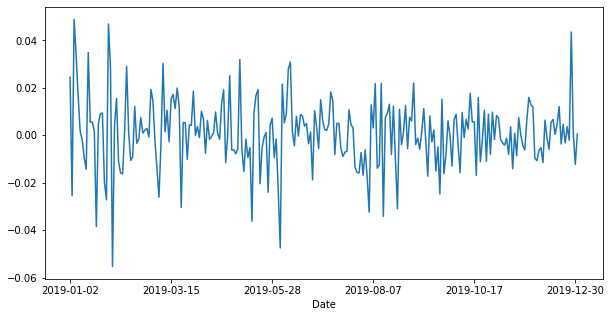

In [ ]:
# code for question 8
amzn_returns.plot(figsize=(10,5))

### 9. Plot the cumulative sum of the Amazon stock returns using the method `.cumsum()` which acts directly on the `amzn_returns` `Series`.

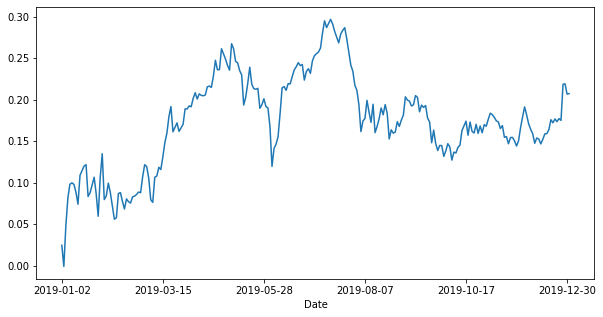

In [ ]:
# code for question 9
amzn_returns.cumsum().plot(figsize=(10,5))

In [ ]:
# the module below will allow us to perform linear regression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The function `lin_reg(x,y)` given below performs ordinary least squares (OLS) linear regression using `sm.OLS` from the `statsmodels.api` module.

The code enclosed in `''' '''` is the docstring of the function `lin_reg`.

`x` in the `lin_reg` function is a matrix that contains the regressors, and `y` represents the vector containing the dependent variable. Note that `x` might contain one vector or multiple vectors. In the case that `x` contains one vector $x$, the regression gives:

$$ y = \beta_0 + \beta_1 x $$

In the case that `x` contains multiple vectors $x_1, \dots, x_k$, the regression becomes:

$$ y = \beta_0 + \beta_1 x_1 + \dots + \beta_k x_k$$

The $\beta$'s are the regression coefficients obtained using least squares. Note that `sm.add_constant` is used in the function below to make `x` look like the matrix $A$ we use in least squares, whose first column contains all ones.

In [ ]:
def lin_reg(x, y):
    '''
    oridinary linear regression using least-squares
    
    Parameters
    ----------  
    x: regressors (numpy array)
    y: dependent variable (numpy array)
    
    Returns
    -------
    coefficients: regression coefficients (pandas Series)
    residuals: regression residuals (numpy array)
    r_squared: correlation coefficient (float)
    
    '''
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    coefficients = model.params
    residuals = model.resid
    r_squared = model.rsquared
    return coefficients, residuals, r_squared

### 10. Let's try to use the obove function. Extract (as numpy array) the stock returns of:

- Apple (ticker symbol `AAPL`) and call it `aapl`
- Intel (ticker symbol `INTC`) and call it `intc`
- Microsoft (ticker symbol `MSFT`) and call it `msft`
- IBM (ticker symbol `IBM`) and call it `ibm`

### Let `y` be the Apple stock returns, and `x` be the Intel stock returns. Use the `lin_reg` function defined above to find $y=\beta_0 + \beta_1 x$. 

In [ ]:
# code for question 10
aapl = np.array(returns['AAPL'])
intc = np.array(returns['INTC'])
msft = np.array(returns['MSFT'])
ibm = np.array(returns['IBM'])

In [ ]:
lin_reg(intc, aapl)

(array([0.00195633, 0.53526326]),
 array([-2.52404291e-03, -7.65933995e-02,  7.97028504e-03, -6.67246823e-03,
         1.35529430e-02,  1.18641773e-02, -4.86231162e-03, -1.58858897e-02,
        -1.07247855e-02,  1.55432797e-02,  1.53879143e-02,  1.95803633e-04,
        -3.70848711e-03, -1.45523640e-02,  5.75186562e-03, -2.98588472e-02,
         6.07322952e-02, -7.48569899e-03, -1.04235826e-02,  5.27654517e-02,
         9.96878256e-03, -1.94589822e-02,  2.06971946e-02,  6.48551194e-03,
        -3.81541327e-03, -1.38417615e-02,  3.47531369e-03, -6.95626072e-03,
        -6.81518375e-03, -1.10207955e-02, -1.91331554e-03, -1.30640488e-02,
         3.73241073e-03,  4.56260586e-03, -7.81909133e-03, -1.98071888e-03,
        -8.82835545e-04, -2.69138170e-03,  1.03604149e-03, -9.01844862e-03,
         5.07437855e-03, -3.32813700e-03, -1.19160641e-03, -3.97791181e-04,
        -1.00485727e-02,  1.64015048e-03,  2.32986478e-02,  7.01368073e-03,
        -5.47843767e-03,  1.83338490e-02,  2.12697114e

### 11. Plot the cumulative sum of the Apple returns prediction from least squares on top of the actual Apple returns. How well do the Intel stock returns describe the Apple stock returns?

Text(0.5, 1.0, 'Cumulative Sum of Expected vs. Actual AAPL Returns')

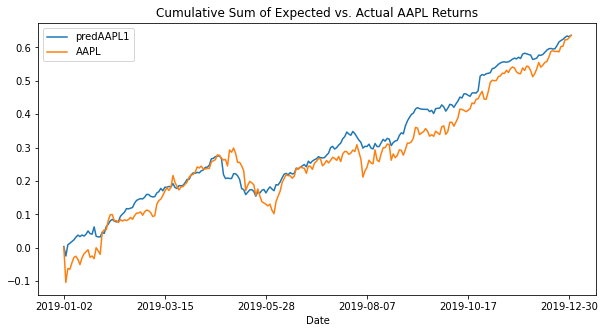

In [ ]:
# code for question 11
reg1 = smf.ols('AAPL~INTC', data=returns).fit()
returns['predAAPL1'] = reg1.predict()

fig,ax = plt.subplots(figsize=(10,5))
returns['predAAPL1'].cumsum().plot(ax=ax)
returns['AAPL'].cumsum().plot(ax=ax)
ax.legend()
ax.set_title('Cumulative Sum of Expected vs. Actual AAPL Returns')

In [ ]:
lin_reg(intc, aapl)[-1]

0.3050299157977575

**30% of the variation in AAPL returns can be explained by variations in INTC**

### 12. Now, let `y` be the Apple stock returns, and `x` be the Intel, Microsoft, and IBM stock returns. Use the `lin_reg` function defined above to find $y=\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3$, where $x_1$ represents Intel returns, $x_2$ represents Microsoft returns, and $x_3$ represents IBM returns. 

In [ ]:
reg2 = smf.ols('AAPL~INTC+MSFT+IBM', data=returns).fit()
params = reg2.params
resids = reg2.resid
r2 = reg2.rsquared
np.array(params), np.array(resids), np.array(r2)

(array([0.00111582, 0.28414114, 0.54372266, 0.15058611]),
 array([-4.94304263e-04, -6.65460988e-02, -6.72134662e-03, -6.41929120e-03,
         9.92225380e-03,  5.32411017e-03,  9.77417738e-04, -8.51568707e-03,
        -7.56492196e-03,  4.65508561e-04,  1.20118446e-02, -1.70485243e-03,
        -9.24676595e-03, -6.51841290e-03, -1.26387243e-02, -1.66478814e-02,
         4.08854418e-02,  1.95828450e-03,  6.21498519e-04,  4.10157592e-02,
         1.85952607e-02, -1.16316230e-03,  7.39361173e-03,  3.36666575e-03,
         3.27424609e-03, -1.07310970e-02, -3.30322398e-04, -4.62551281e-03,
        -1.03741396e-02, -9.09210281e-03,  1.29837834e-03, -1.64306035e-02,
         2.82795807e-03,  8.95041391e-03, -1.80550333e-02, -5.14974230e-03,
        -3.97097731e-04, -5.25622324e-03,  3.43789381e-03, -7.69359922e-03,
         3.93866247e-03,  2.65125243e-03,  1.75414244e-03, -2.25294464e-03,
        -2.42424801e-03,  1.61705829e-03,  1.40788782e-02,  4.47193585e-03,
        -5.41500218e-03,  1.41

### 13. Plot the cumulative sum of the Apple returns prediction from least squares on top of the cumulative sum of actual Apple returns. How well do the Intel, Microsoft, and IBM stock returns describe the Apple stock returns?

Text(0.5, 1.0, 'Cumulative Sum of Expected vs. Actual AAPL Returns')

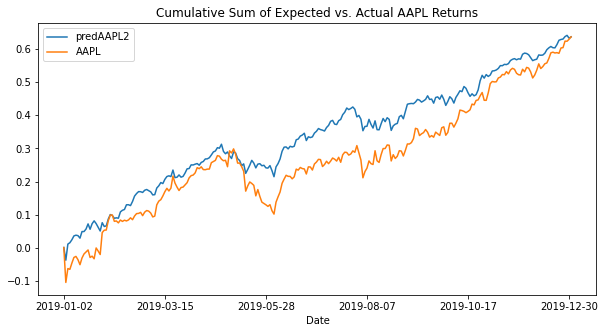

In [ ]:
# code for question 13
# code for question 12
reg2 =  smf.ols('AAPL~INTC+MSFT+IBM', data=returns).fit()
returns['predAAPL2'] = reg2.predict()

fig,ax = plt.subplots(figsize=(10,5))
returns['predAAPL2'].cumsum().plot(ax=ax)
returns['AAPL'].cumsum().plot(ax=ax)
ax.legend()
ax.set_title('Cumulative Sum of Expected vs. Actual AAPL Returns')

In [ ]:
r2

0.47047307056763

**47% of the variation in AAPL returns can be explained by variations in INTC, MSFT, and IBM returns**

The file `SPY.csv` contains the prices of SPDR S&P 500 ETF Trust. This Exchage Traded Fund (ETF) contains a collection of assets currently present in the S&P 500 index. 

### 14. Load `SPY.csv` into a DataFrame called `spy_prices` using the `read_csv` method in `pandas`. Make sure to make the 'Date' column to be your index column. To do that, read the docstring for `read_csv`. 

In [ ]:
# code for question 14
spy_prices = pd.read_csv('/content/drive/MyDrive/LinAlg/SPY.csv').set_index('Date')

### 15. Once you have downloaded the file into the `DataFrame`, observe all the available prices and dates. Show the head of the `DataFrame`, and then answer the following questions:

(a) Which prices are reported?

(b) From which date to which date are these prices reported?

In [ ]:
# code for question 15
spy_prices.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,206.880005,204.179993,206.380005,205.429993,121465900.0,184.260223
2015-01-05,204.369995,201.350006,204.169998,201.720001,169632600.0,180.932541
2015-01-06,202.720001,198.860001,202.089996,199.820007,209151400.0,179.228363
2015-01-07,202.720001,200.880005,201.419998,202.309998,125346700.0,181.461731
2015-01-08,206.160004,203.990005,204.009995,205.899994,147217800.0,184.681763


In [ ]:
spy_prices.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-26,302.190002,295.459991,301.929993,299.079987,88951400.0,297.769623
2020-05-27,303.570007,296.869995,302.119995,303.529999,104817400.0,302.200134
2020-05-28,306.839996,302.239990,304.649994,302.970001,90405200.0,301.642609
2020-05-29,304.959991,299.470001,302.459991,304.320007,119265700.0,302.986694
2020-06-01,306.209991,303.059998,303.619995,305.549988,55758300.0,304.211273


**a) The day's highest price, the day's lowerst price, the day's opening price, and the day's closing price and adjusted closing price are reported.**
**b) The prices are reported from 01/02/2015 to 06/01/2020.**

### 16. Retain only the Adjusted Close price in the `spy_prices` `DataFrame`. Call the resulting `Series` `spy_adjclose`.

In [ ]:
# code for question 16
spy_adjclose = spy_prices['Adj Close']

### 17. Now, using the `pct_change` method in `pandas`, compute the returns on the Adjusted Close prices of SPY, and only retain the returns from '2019-01-01' to '2020-01-01'. Call the `Series` obtained `spy_returns`.

In [ ]:
# code for question 17
spy_returns = spy_adjclose.pct_change()['2019-01-02':'2019-12-31']

### 18. Perform SVD on `returns` data that contain assets from the S&P 500. Retain the left singular vector corresponding to the largest singular value and call is `u_sigma1`.

In [ ]:
# code for question 18
U, Sigma, V = la.svd(returns)

In [ ]:
next(i for i,v in enumerate(U) if U.max() in v)

146

In [ ]:
u_sigma1 = U[146]

### 19. `u_sigma1` is thought to track the market. To test that, we will perform a regression of `spy_returns` against this first left singular vector by letting `y=spy_returns` and `x=u_sigma1` and computing

### $$ y = \beta_0 + \beta_1 x$$
### using least squares regression.

In [ ]:
df = pd.DataFrame({'u_sigma1':u_sigma1, 'spy_returns':spy_returns})
reg3 = smf.ols('spy_returns~u_sigma1', data=df).fit()
params = reg3.params
resids = reg3.resid
r2 = reg3.rsquared
np.array(params), np.array(resids), np.array(r2)

(array([1.10941717e-03, 8.27783107e-05]),
 array([-8.00657005e-05, -2.49879622e-02,  3.23804214e-02,  6.77938937e-03,
         8.28851430e-03,  3.54066568e-03,  2.40022118e-03, -7.62876467e-04,
        -7.21983308e-03,  1.03383181e-02,  1.32201387e-03,  6.49353611e-03,
         1.22078761e-02, -1.46243972e-02,  9.80789775e-04, -5.73543871e-04,
         7.34807671e-03, -8.69291614e-03, -2.43476668e-03,  1.47323370e-02,
         7.66124784e-03, -6.21206203e-04,  5.91445822e-03,  3.06991527e-03,
        -2.43341546e-03, -1.06426777e-02,  1.15504152e-04, -5.48628319e-04,
         1.17564893e-02,  2.14098137e-03, -3.32866114e-03,  9.78750258e-03,
         6.23730283e-04,  9.05225329e-04, -4.66589862e-03,  5.09047618e-03,
         2.50744170e-04, -1.83065136e-03, -1.53851901e-03, -2.96556577e-03,
         5.13943022e-03, -4.73878554e-03, -2.48201020e-03, -7.16261480e-03,
        -9.47356392e-03, -3.10605441e-03,  1.33955454e-02,  2.66126001e-03,
         5.50689356e-03, -1.74989514e-03,  3.8

### 20. Plot the cumulative sum of the result from the regression on top of the cumulative sum of `spy_returns`. What do you notice?

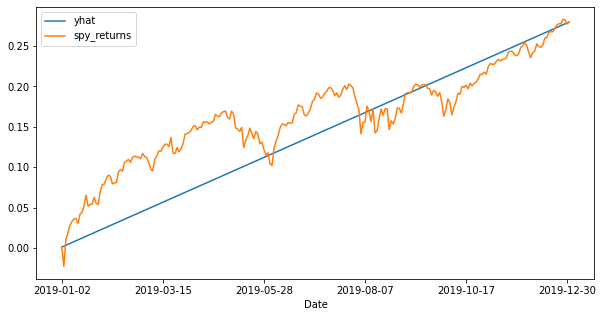

In [ ]:
# code for question 20
df['yhat'] = reg3.predict()
fig,ax = plt.subplots(figsize=(10,5))
df['yhat'].cumsum().plot(ax=ax)
df['spy_returns'].cumsum().plot(ax=ax)
ax.legend()

**The results of the regression are an increasing, linear predictor of actual cumulative returns. Actual cumulative returns do not appear to be linear, so this linear line of best fit has noticeable errors across most dates.**

# Congratulations! You have just implemented your first statistical Capital Asset Pricing Model (CAPM) to the S&P 500 market.